<a href="https://colab.research.google.com/github/Rivi9/Laptop-Recommendation-System/blob/Main-Model/laptop_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [337]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning and Formatting

**Load in the Data and Examine**

In [338]:
df = pd.read_csv('laptops.csv')

In [339]:
df.head(3)

,laptop_id,name,price,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases
0,0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/l...,15.6,3.8,5.0,1.0,ASUS,Windows,AMD,Gaming
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,4.3,10406.0,1040.0,ASUS,Windows,Intel,Home/Everyday use


In [340]:
df.shape

(796, 16)

In [341]:
df

,laptop_id,name,price,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases
0,0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/l...,15.6,3.8,5.0,1.0,ASUS,Windows,AMD,Gaming
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,4.3,10406.0,1040.0,ASUS,Windows,Intel,Home/Everyday use
3,3,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,14.0,3.8,18.0,3.0,Lenovo,DOS,AMD,Budget Friendly
4,4,APPLE 2020 Macbook Air M1,86990,Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operating System,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...,13.3,4.7,8865.0,795.0,APPLE,MacOS,Apple M1,Multimedia/Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,791,ASUS EeeBook 12 Celeron Dual Core,18990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/l...,11.6,4.0,20.0,1.0,ASUS,Windows,Intel,Student/Education
792,792,Ultimus S151 Celeron Dual Core,19990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Windows 11 Operating System,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,14.1,NaN,NaN,NaN,Ultimus,Windows,Intel,Ultra-portable
793,793,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,14.0,4.5,22.0,5.0,ASUS,Windows,AMD,Gaming
794,794,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...,15.6,4.0,801.0,104.0,DELL,Windows,Intel,Business/Professional


**Data Types and Missing Values**

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   laptop_id        796 non-null    int64  
 1   name             796 non-null    object 
 2   price            796 non-null    int64  
 3   processor        796 non-null    object 
 4   ram              796 non-null    object 
 5   os               796 non-null    object 
 6   storage          796 non-null    object 
 7   img_link         796 non-null    object 
 8   display          796 non-null    float64
 9   rating           530 non-null    float64
 10  no_of_ratings    530 non-null    float64
 11  no_of_reviews    530 non-null    float64
 12  laptop_brand     796 non-null    object 
 13  os_brand         796 non-null    object 
 14  processor_brand  796 non-null    object 
 15  usecases         796 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 99.6+ KB


In [343]:
df.isnull().sum()

laptop_id            0
name                 0
price                0
processor            0
ram                  0
os                   0
storage              0
img_link             0
display              0
rating             266
no_of_ratings      266
no_of_reviews      266
laptop_brand         0
os_brand             0
processor_brand      0
usecases             0
dtype: int64

**Drop Columns and Null Values**

In [344]:
df = df.drop(['rating','no_of_ratings','no_of_reviews'], axis = 1)

In [345]:
df.head()

,laptop_id,name,price,processor,ram,os,storage,img_link,display,laptop_brand,os_brand,processor_brand,usecases
0,0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Windows,Intel,Business/Professional
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/l...,15.6,ASUS,Windows,AMD,Gaming
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,ASUS,Windows,Intel,Home/Everyday use
3,3,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,14.0,Lenovo,DOS,AMD,Budget Friendly
4,4,APPLE 2020 Macbook Air M1,86990,Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operating System,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...,13.3,APPLE,MacOS,Apple M1,Multimedia/Entertainment


In [346]:
df = df.dropna()

In [347]:
df.isnull().sum()

laptop_id          0
name               0
price              0
processor          0
ram                0
os                 0
storage            0
img_link           0
display            0
laptop_brand       0
os_brand           0
processor_brand    0
usecases           0
dtype: int64

In [348]:
df.nunique()

laptop_id          796
name               506
price              449
processor           59
ram                 22
os                  11
storage             16
img_link           584
display             21
laptop_brand        20
os_brand             4
processor_brand      6
usecases             8
dtype: int64

In [349]:
df.shape

(796, 13)

In [350]:
df.duplicated().sum()

0

In [351]:
df.iloc[0].laptop_brand

'Lenovo'

In [352]:
df.head(1)

,laptop_id,name,price,processor,ram,os,storage,img_link,display,laptop_brand,os_brand,processor_brand,usecases
0,0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Windows,Intel,Business/Professional


In [353]:
df['processor'] = df['processor'].apply(lambda x:x.split())
df['ram'] = df['ram'].apply(lambda x:x.split())
df['os'] = df['os'].apply(lambda x:x.split())
df['use'] = df['usecases'].apply(lambda x:x.split())

In [354]:
df['tags'] = df['processor']+df['ram']+df['os']+df['use']

In [355]:
df.head(1)

,laptop_id,name,price,processor,ram,os,storage,img_link,display,laptop_brand,os_brand,processor_brand,usecases,use,tags
0,0,Lenovo Intel Core i5 11th Gen,62990,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Windows,Intel,Business/Professional,[Business/Professional],"[Intel, Core, i5, Processor, (11th, Gen), 16, ..."


In [356]:
df.iloc[0].tags

['Intel',
 'Core',
 'i5',
 'Processor',
 '(11th',
 'Gen)',
 '16',
 'GB',
 'DDR4',
 'RAM',
 'Windows',
 '11',
 'Operating',
 'System',
 'Business/Professional']

In [357]:
new = df.drop(columns=['processor','ram','os','storage','os_brand','processor_brand','use'])

In [358]:
new.head(2)

,laptop_id,name,price,img_link,display,laptop_brand,usecases,tags
0,0,Lenovo Intel Core i5 11th Gen,62990,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Business/Professional,"[Intel, Core, i5, Processor, (11th, Gen), 16, ..."
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,https://rukminim1.flixcart.com/image/312/312/l...,15.6,ASUS,Gaming,"[AMD, Ryzen, 9, Octa, Core, Processor, 16, GB,..."


In [359]:
new['tags'] = new['tags'].apply(lambda x:" ".join(x))

In [360]:
new.iloc[0].tags

'Intel Core i5 Processor (11th Gen) 16 GB DDR4 RAM Windows 11 Operating System Business/Professional'

In [361]:
new.head(2)

,laptop_id,name,price,img_link,display,laptop_brand,usecases,tags
0,0,Lenovo Intel Core i5 11th Gen,62990,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Business/Professional,Intel Core i5 Processor (11th Gen) 16 GB DDR4 ...
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,https://rukminim1.flixcart.com/image/312/312/l...,15.6,ASUS,Gaming,AMD Ryzen 9 Octa Core Processor 16 GB DDR5 RAM...


In [362]:
ps = PorterStemmer()

In [363]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [364]:
new['tags'] = new['tags'].apply(stem)

In [365]:
new.iloc[0].tags

'intel core i5 processor (11th gen) 16 gb ddr4 ram window 11 oper system business/profession'

In [366]:
new.head(2)

,laptop_id,name,price,img_link,display,laptop_brand,usecases,tags
0,0,Lenovo Intel Core i5 11th Gen,62990,https://rukminim1.flixcart.com/image/312/312/x...,15.6,Lenovo,Business/Professional,intel core i5 processor (11th gen) 16 gb ddr4 ...
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Batter...,161990,https://rukminim1.flixcart.com/image/312/312/l...,15.6,ASUS,Gaming,amd ryzen 9 octa core processor 16 gb ddr5 ram...


In [367]:
new['usecases'] = new['usecases'].str.replace(' Gaming','Gaming')
new['usecases'] = new['usecases'].str.replace(' Business/Professional','Business/Professional')
new['usecases'] = new['usecases'].str.replace(' Multimedia/Entertainment','IT')
new['usecases'] = new['usecases'].str.replace(' Student/Education','Student/Education')
new['usecases'] = new['usecases'].str.replace(' Creative/Design','Creative/Design')
new['usecases'] = new['usecases'].str.replace(' Travel/On-the-go','Basic')
new['usecases'] = new['usecases'].str.replace(' Home/Everyday use','Basic')
new['usecases'] = new['usecases'].str.replace(' Programming/Development','IT')
new['usecases'] = new['usecases'].str.replace(' Budget Friendly','Basic')
new['usecases'] = new['usecases'].str.replace('Ultra-portable','IT')




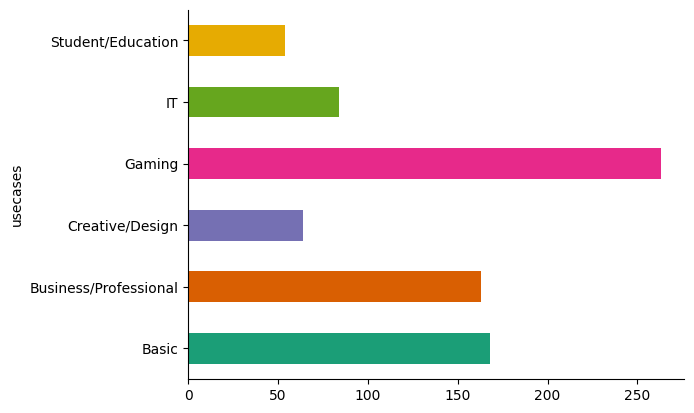

In [368]:
new.groupby('usecases').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Vectorization

**Word2Vec**

In [369]:
# Tokenize the tags
new['tags_tokens'] = new['tags'].apply(word_tokenize)

In [370]:
# Train the Word2Vec model
model = Word2Vec(sentences=new['tags_tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [371]:
# Get the Word2Vec vectors for each laptop
word2vec_vectors = []
for tags_tokens in new['tags_tokens']:
    vectors = [model.wv[word] for word in tags_tokens if word in model.wv]
    if vectors:
        word2vec_vectors.append(np.mean(vectors, axis=0))
    else:
        word2vec_vectors.append(np.zeros(100))

In [372]:
word2vec_vectors = np.array(word2vec_vectors)

**Cosine Similarity**

In [373]:
word2vec_similarity = cosine_similarity(word2vec_vectors)

In [374]:
#Print the similarity of the first laptop with others
print(word2vec_similarity[0])


[1.0000001  0.9993506  0.9999611  0.99957436 0.99952763 0.99974424
 0.99996483 0.9999909  0.99958694 0.9999873  0.9999783  0.9999949
 0.9999822  0.99995816 0.99996483 0.99937904 0.9994247  0.99997413
 0.99952763 0.99996376 0.99998635 0.9995455  0.99996483 0.9999778
 0.9996436  0.9999783  0.9994247  0.99942297 0.9999783  1.0000001
 0.9992988  0.99937594 0.9999838  0.9999783  0.99980074 0.9994247
 0.99997824 0.99998635 0.99995816 0.999963   0.9999873  0.9999838
 0.99975973 0.99996483 0.9994827  0.9999873  0.99996483 0.99998635
 0.99939054 0.99996954 0.9994046  0.99998206 0.99997485 0.99998766
 0.9994003  0.9999751  0.9995415  0.99999124 0.9994003  0.9999778
 0.9999783  0.9999529  0.99967265 0.99967265 0.99997485 0.9999624
 0.99936616 0.9999686  0.9994078  0.99998724 0.99967754 0.99958694
 0.9993516  0.99997485 0.9999817  0.9993094  0.99998856 0.9999838
 0.99998105 0.9999909  0.99969083 0.9999783  0.9999794  0.9993516
 0.9999873  0.9999803  0.9994056  0.9994056  0.9994056  0.9999873
 0.99

# Recommendation

In [375]:
# def recommends(laptop):
#     index = new[new['usecases']==laptop].index[0]
#     distances = sorted(list(enumerate(word2vec_similarity[index])), reverse=True, key = lambda x:x[1])
#     for i in distances[1:10]:
#         print(new.iloc[i[0]].price)

In [376]:
def recommends():
  use = input('Enter the Workfield :-')
  index = new[new['usecases'] == use].index[0]
  distances = sorted(list(enumerate(word2vec_similarity[index])), reverse=True, key=lambda x: x[1])
  printed_names = set()
  for i in distances[1:50]:
    row_index = i[0]
    name = new.iloc[row_index]['name']
    price = new.iloc[row_index]['price']
    if name not in printed_names:
      printed_names.add(name)
      print(name)
      print(price)


In [377]:
# sorted(list(enumerate(word2vec_similarity[0])), reverse=True, key = lambda x:x[1])

In [378]:
recommends()

Enter the Workfield :-IT
APPLE 2020 Macbook Air M1
86990
APPLE 2020 Macbook Pro M1
129990
APPLE MacBook Air M1
104990
APPLE 2022 MacBook AIR M2
131990
APPLE 2021 Macbook Pro M1 Max
307990
APPLE 2022 MacBook Pro M2
121990
APPLE 2021 Macbook Pro M1 Pro
219894
APPLE 2023 MacBook Pro M2 Pro
249900
DELL Ryzen 3 Dual Core 3rd Gen
43490
HP Athlon Dual Core 3050U
26990
Lenovo Athlon Dual Core
18990
Avita PURA APU Dual Core A6 9220e
24490
Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core
28490
ASUS Vivobook 11 Celeron Dual Core
24990
Lenovo IdeaPad 3 Dual Core 3020e
27990
Lenovo Athlon Dual Core 3050U
20990
HP G8 Ryzen 3 Dual Core AMD Ryzen 3 3250U
28490
HP Ryzen 3 Dual Core
36600
ASUS Vivobook 15 Ryzen 3 Dual Core AMD R3
34990
Lenovo Celeron Dual Core
27990


# Export the Dataframe and the Model

In [379]:
pickle.dump(new, open('dataframe.pkl','wb'))
pickle.dump(word2vec_similarity, open('word2vec_similarity.pkl','wb'))